In [1]:
import numpy as np
import pandas as pd
from pathlib import Path


In [2]:
# Setting up data directory
data_dir = Path("data")

In [3]:
# Load train.csv file from data directory
train_file = data_dir / "train.csv"
training_data = pd.read_csv(train_file)

In [6]:
# training data columns
training_data.columns
# sample rows
training_data.head()

ImageID  distance    location
0        0       351  [215, 158]
1        1       372  [228, 269]
2        2       488  [255, 386]
3        3       308  [306, 426]
4        4        67  [248, 338]

Distance: 351, Location: [215, 158]


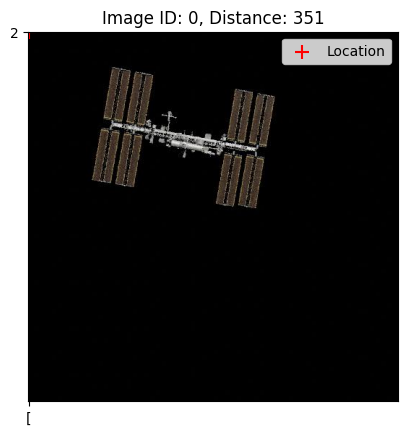

In [7]:
# Display a sample jpg image from data/train and the corresponding distance and location from trining_data
# # Overlay a red point on the image at the location specified in training_data
# Set image id
from matplotlib import pyplot as plt


image_id = 0
# Load the image
image_file = data_dir / "train" / f"{image_id}.jpg"
image = plt.imread(image_file)
# Display the image
plt.imshow(image)
# Get the corresponding distance and location from training_data
distance = training_data.loc[image_id, 'distance']
location = training_data.loc[image_id, 'location']
# Overlay a red *crosshair* on the image at the location specified in training_data
plt.scatter(location[0], location[1], color='red', s=100, marker='+', label='Location')
plt.title(f"Image ID: {image_id}, Distance: {distance}")
print(f"Distance: {distance}, Location: {location}")
plt.legend()
plt.show()


In [ ]:
# Image resolution
image_resolution = (image.shape[0], image.shape[1])
print(f"Image Resolution: {image_resolution}")

Image Resolution: (512, 512)


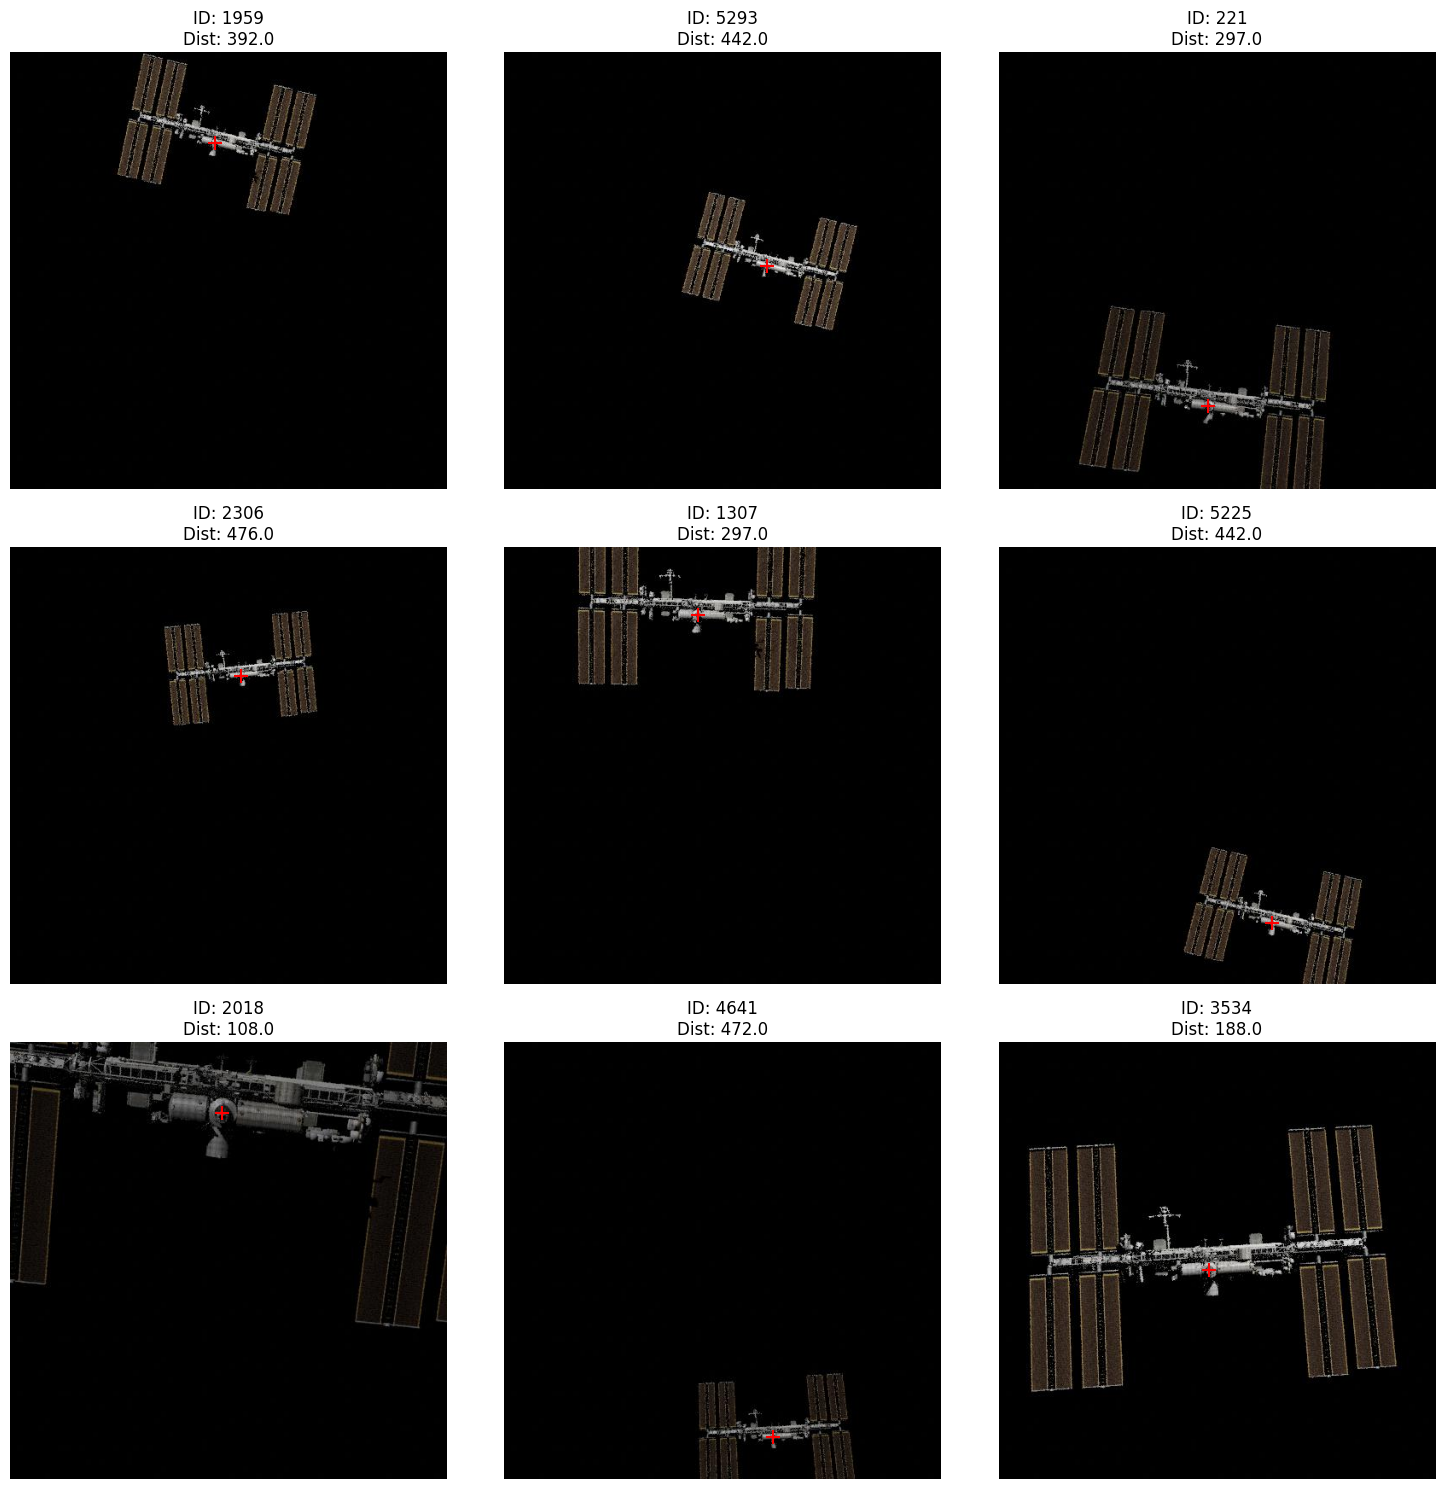

In [10]:
# Create a grid of sample images with crosshairs
import matplotlib.pyplot as plt
import ast

def plot_image_with_crosshair(ax, image_id):
    # Load the image
    image_file = data_dir / "train" / f"{image_id}.jpg"
    image = plt.imread(image_file)
    
    # Display the image
    ax.imshow(image)
    
    # Get location and distance
    distance = training_data.loc[image_id, 'distance']
    location_str = training_data.loc[image_id, 'location']
    location = ast.literal_eval(location_str)
    
    # Plot crosshair
    ax.scatter(location[0], location[1], color='red', s=100, marker='+', label='Location')
    ax.set_title(f"ID: {image_id}\nDist: {distance:.1f}")
    ax.axis('off')

# Create a 3x3 grid of random sample images
plt.figure(figsize=(15, 15))
sample_ids = np.random.choice(training_data.index, 9, replace=False)

for i, image_id in enumerate(sample_ids):
    ax = plt.subplot(3, 3, i+1)
    plot_image_with_crosshair(ax, image_id)

plt.tight_layout()
plt.show()

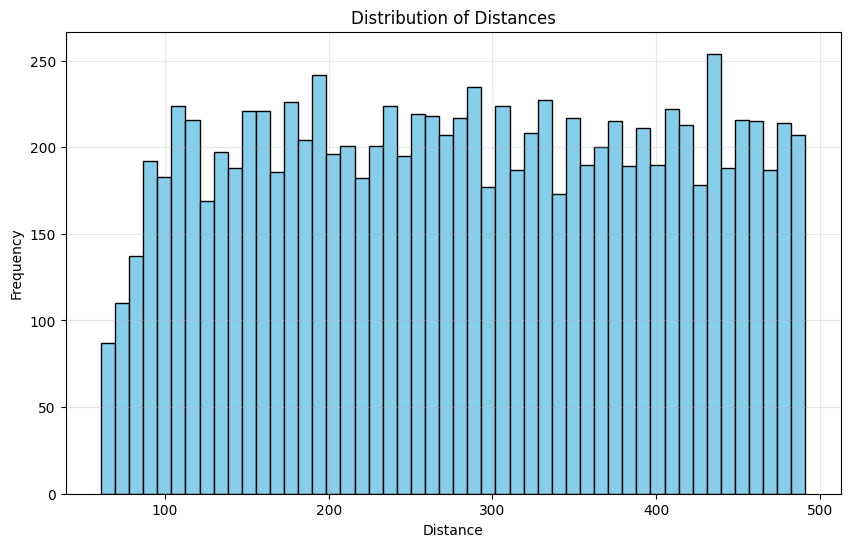

Mean distance: 282.47
Median distance: 282.00
Min distance: 61.00
Max distance: 491.00


In [8]:
# Analyze the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(training_data['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate some statistics
print(f"Mean distance: {training_data['distance'].mean():.2f}")
print(f"Median distance: {training_data['distance'].median():.2f}")
print(f"Min distance: {training_data['distance'].min():.2f}")
print(f"Max distance: {training_data['distance'].max():.2f}")

In [4]:
# Dataset Overview and Basic Statistics
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Total number of samples: {len(training_data)}")
print(f"Dataset shape: {training_data.shape}")
print(f"Data types:\n{training_data.dtypes}")
print(f"\nMissing values:\n{training_data.isnull().sum()}")
print(f"\nDataset memory usage: {training_data.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Basic statistics
print("\n" + "="*50)
print("DISTANCE STATISTICS")
print("="*50)
distance_stats = training_data['distance'].describe()
print(distance_stats)

# Check for duplicates
print(f"\nDuplicate rows: {training_data.duplicated().sum()}")
print(f"Unique ImageIDs: {training_data['ImageID'].nunique()}")

DATASET OVERVIEW
Total number of samples: 10000
Dataset shape: (10000, 3)
Data types:
ImageID      int64
distance     int64
location    object
dtype: object

Missing values:
ImageID     0
distance    0
location    0
dtype: int64

Dataset memory usage: 809.85 KB

DISTANCE STATISTICS
count    10000.000000
mean       282.465300
std        120.648397
min         61.000000
25%        179.000000
50%        282.000000
75%        387.000000
max        491.000000
Name: distance, dtype: float64

Duplicate rows: 0
Unique ImageIDs: 10000


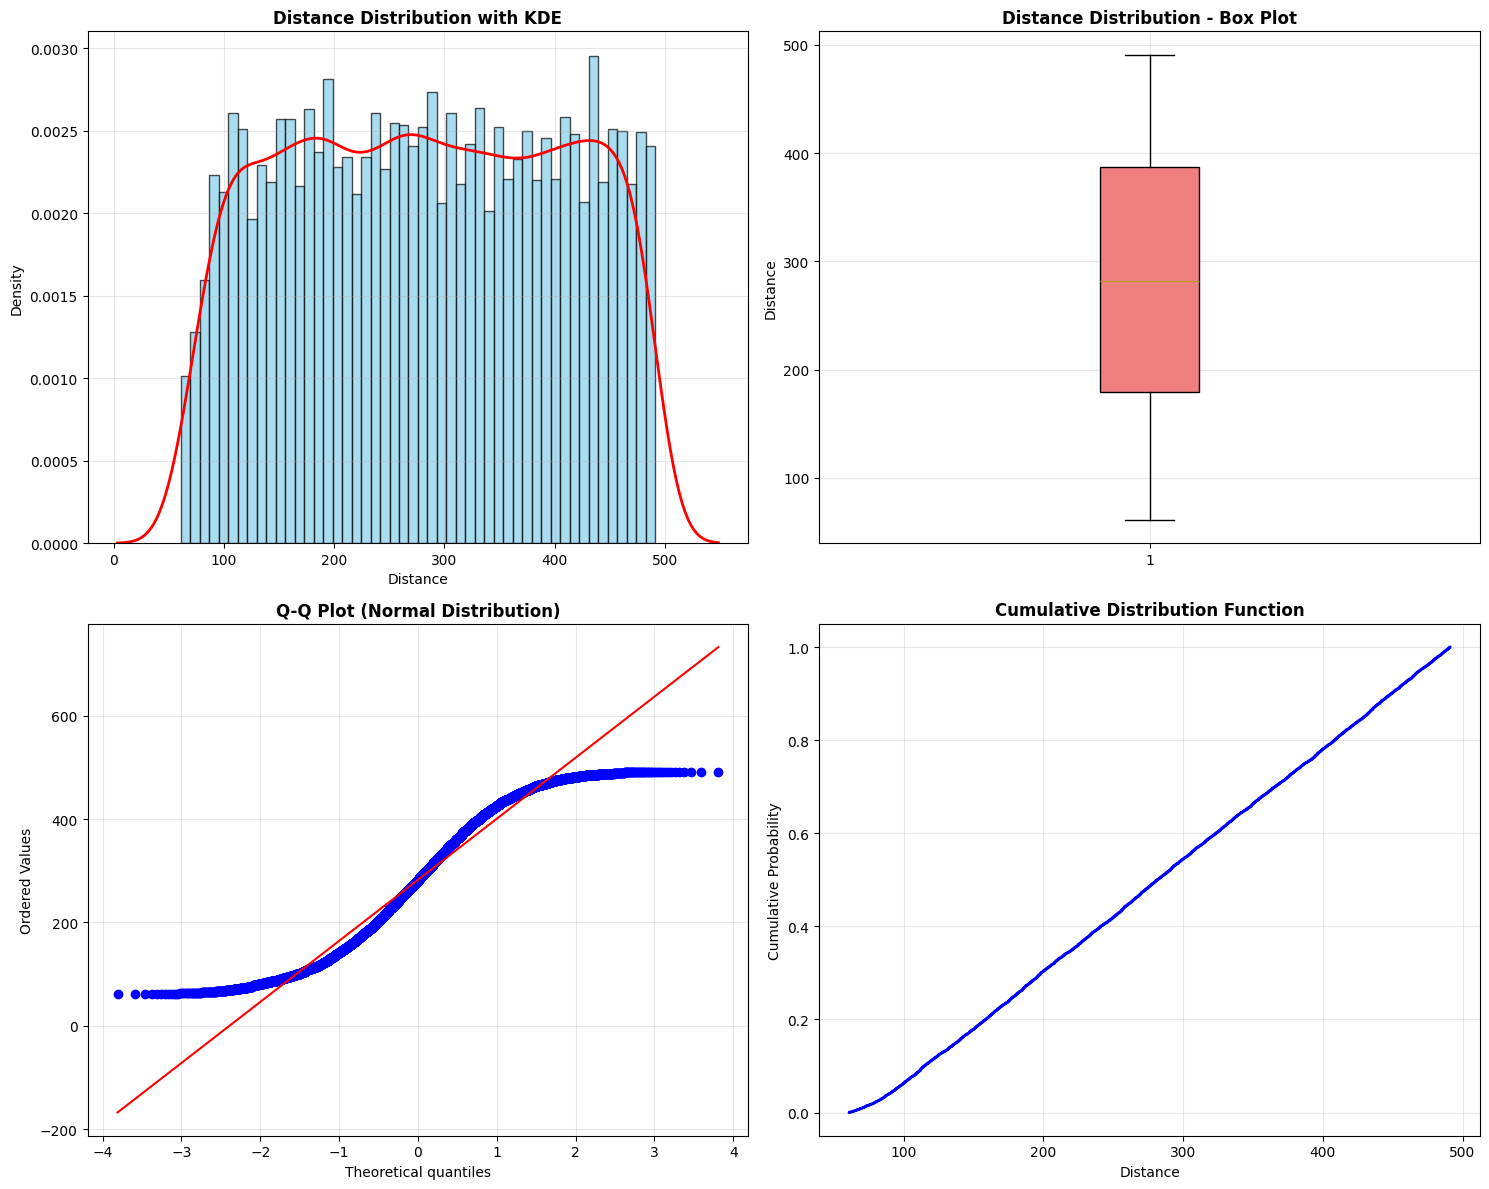

STATISTICAL ANALYSIS
Shapiro-Wilk Test (n=5000):
  Statistic: 0.9587
  P-value: 0.000000
  Normal distribution: No

Skewness: -0.0080 (Left-skewed)
Kurtosis: -1.1822 (Light-tailed)


In [5]:
# Enhanced Distance Distribution Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ast

# Set style for better-looking plots
plt.style.use('default')  # Using default instead of seaborn-v0_8
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram with KDE
axes[0,0].hist(training_data['distance'], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
sns.kdeplot(data=training_data, x='distance', ax=axes[0,0], color='red', linewidth=2)
axes[0,0].set_title('Distance Distribution with KDE', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Distance')
axes[0,0].set_ylabel('Density')
axes[0,0].grid(True, alpha=0.3)

# 2. Box plot
box_plot = axes[0,1].boxplot(training_data['distance'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
axes[0,1].set_title('Distance Distribution - Box Plot', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Distance')
axes[0,1].grid(True, alpha=0.3)

# 3. Q-Q plot to check normality
stats.probplot(training_data['distance'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normal Distribution)', fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Cumulative distribution
sorted_distances = np.sort(training_data['distance'])
cumulative_prob = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)
axes[1,1].plot(sorted_distances, cumulative_prob, 'b-', linewidth=2)
axes[1,1].set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Distance')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests
print("="*50)
print("STATISTICAL ANALYSIS")
print("="*50)
# Shapiro-Wilk test for normality (use subset for large datasets)
sample_size = min(5000, len(training_data))
sample_distances = np.random.choice(training_data['distance'], sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_distances)
print(f"Shapiro-Wilk Test (n={sample_size}):")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.6f}")
print(f"  Normal distribution: {'Yes' if shapiro_p > 0.05 else 'No'}")

# Skewness and Kurtosis
skewness = stats.skew(training_data['distance'])
kurtosis = stats.kurtosis(training_data['distance'])
print(f"\nSkewness: {skewness:.4f} ({'Right-skewed' if skewness > 0 else 'Left-skewed' if skewness < 0 else 'Symmetric'})")
print(f"Kurtosis: {kurtosis:.4f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed' if kurtosis < 0 else 'Normal-tailed'})")

In [4]:
# Location Analysis - Extract and analyze spatial coordinates
# Parse location strings to get x,y coordinates
locations = training_data['location'].apply(ast.literal_eval)
x_coords = [loc[0] for loc in locations]
y_coords = [loc[1] for loc in locations]

# Add coordinates as separate columns for easier analysis
training_data['x_coord'] = x_coords
training_data['y_coord'] = y_coords

print("="*50)
print("SPATIAL COORDINATE ANALYSIS")
print("="*50)
print(f"X coordinates - Min: {min(x_coords)}, Max: {max(x_coords)}, Mean: {np.mean(x_coords):.1f}")
print(f"Y coordinates - Min: {min(y_coords)}, Max: {max(y_coords)}, Mean: {np.mean(y_coords):.1f}")

# Create comprehensive spatial analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Scatter plot of all locations
scatter = axes[0,0].scatter(x_coords, y_coords, c=training_data['distance'], 
                           cmap='viridis', alpha=0.6, s=30)
axes[0,0].set_title('Target Locations (colored by distance)', fontweight='bold')
axes[0,0].set_xlabel('X Coordinate')
axes[0,0].set_ylabel('Y Coordinate')
plt.colorbar(scatter, ax=axes[0,0], label='Distance')

# 2. X coordinate distribution
axes[0,1].hist(x_coords, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('X Coordinate Distribution', fontweight='bold')
axes[0,1].set_xlabel('X Coordinate')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Y coordinate distribution
axes[0,2].hist(y_coords, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0,2].set_title('Y Coordinate Distribution', fontweight='bold')
axes[0,2].set_xlabel('Y Coordinate')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)

# 4. Heatmap of target locations
from scipy.stats import gaussian_kde
# Create a grid for the heatmap
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_coords, y_coords])
kernel = gaussian_kde(values)
density = np.reshape(kernel(positions).T, xx.shape)

im = axes[1,0].imshow(density, extent=[x_min, x_max, y_min, y_max], 
                      origin='lower', cmap='hot', aspect='auto')
axes[1,0].set_title('Location Density Heatmap', fontweight='bold')
axes[1,0].set_xlabel('X Coordinate')
axes[1,0].set_ylabel('Y Coordinate')
plt.colorbar(im, ax=axes[1,0], label='Density')

# 5. Distance vs X coordinate
axes[1,1].scatter(x_coords, training_data['distance'], alpha=0.5, color='purple')
axes[1,1].set_title('Distance vs X Coordinate', fontweight='bold')
axes[1,1].set_xlabel('X Coordinate')
axes[1,1].set_ylabel('Distance')
axes[1,1].grid(True, alpha=0.3)

# 6. Distance vs Y coordinate
axes[1,2].scatter(y_coords, training_data['distance'], alpha=0.5, color='red')
axes[1,2].set_title('Distance vs Y Coordinate', fontweight='bold')
axes[1,2].set_xlabel('Y Coordinate')
axes[1,2].set_ylabel('Distance')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'ast' is not defined

CORRELATION ANALYSIS
X-coordinate vs Distance:
  Pearson correlation: 0.0032 (p-value: 0.750485)
Y-coordinate vs Distance:
  Pearson correlation: -0.0093 (p-value: 0.354192)
X-coordinate vs Y-coordinate:
  Pearson correlation: -0.0042 (p-value: 0.670990)

Spearman Rank Correlations:
X-coordinate vs Distance: 0.0032 (p-value: 0.749615)
Y-coordinate vs Distance: -0.0093 (p-value: 0.350129)


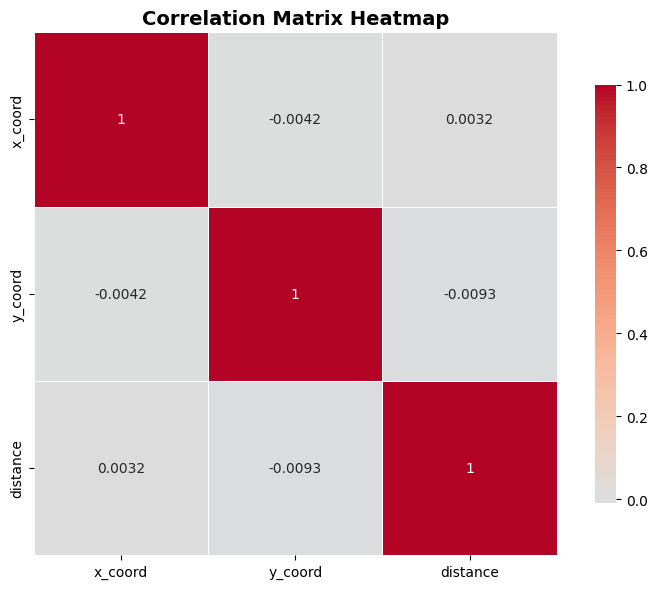

In [7]:
# Correlation Analysis and Advanced Statistics
from scipy.stats import pearsonr, spearmanr

print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Calculate correlations
corr_x_dist, p_x_dist = pearsonr(training_data['x_coord'], training_data['distance'])
corr_y_dist, p_y_dist = pearsonr(training_data['y_coord'], training_data['distance'])
corr_x_y, p_x_y = pearsonr(training_data['x_coord'], training_data['y_coord'])

print(f"X-coordinate vs Distance:")
print(f"  Pearson correlation: {corr_x_dist:.4f} (p-value: {p_x_dist:.6f})")
print(f"Y-coordinate vs Distance:")
print(f"  Pearson correlation: {corr_y_dist:.4f} (p-value: {p_y_dist:.6f})")
print(f"X-coordinate vs Y-coordinate:")
print(f"  Pearson correlation: {corr_x_y:.4f} (p-value: {p_x_y:.6f})")

# Spearman correlation (rank-based, non-parametric)
spear_x_dist, sp_x_dist = spearmanr(training_data['x_coord'], training_data['distance'])
spear_y_dist, sp_y_dist = spearmanr(training_data['y_coord'], training_data['distance'])

print(f"\nSpearman Rank Correlations:")
print(f"X-coordinate vs Distance: {spear_x_dist:.4f} (p-value: {sp_x_dist:.6f})")
print(f"Y-coordinate vs Distance: {spear_y_dist:.4f} (p-value: {sp_y_dist:.6f})")

# Create correlation matrix visualization
correlation_data = training_data[['x_coord', 'y_coord', 'distance']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

DISTANCE BINNING ANALYSIS
Distance Bin Analysis:
             distance                          x_coord        y_coord        
                count    mean    std  min  max    mean    std    mean     std
distance_bin                                                                 
Very Close       1733  109.10  22.98   61  147  265.28  37.14  277.53  123.40
Close            2078  190.22  24.64  148  233  265.90  37.36  284.70  124.14
Medium           2096  276.43  24.56  234  319  266.67  36.96  277.46  125.66
Far              2016  362.37  24.89  320  405  264.85  37.42  277.00  124.71
Very Far         2077  447.94  24.75  406  491  266.03  37.27  278.78  126.60


C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3823454543.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = training_data.groupby('distance_bin').agg({


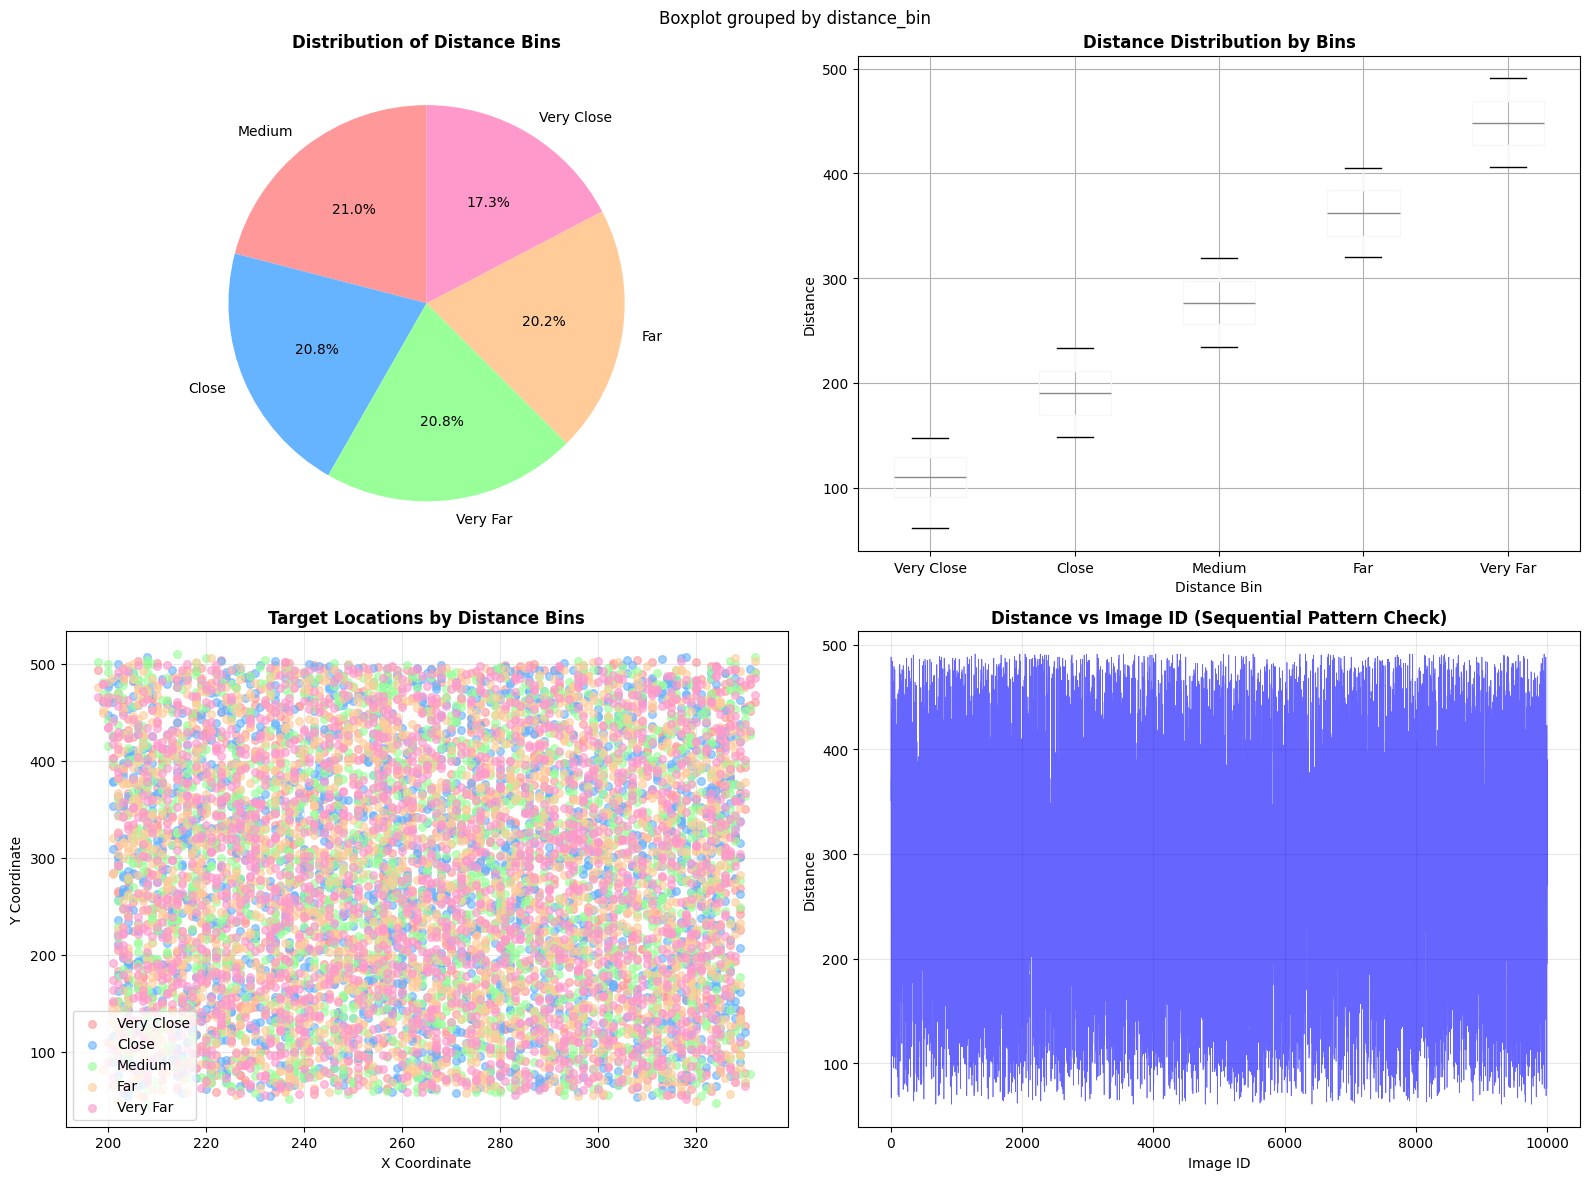

In [8]:
# Distance Binning and Target Zone Analysis
print("="*50)
print("DISTANCE BINNING ANALYSIS")
print("="*50)

# Create distance bins
training_data['distance_bin'] = pd.cut(training_data['distance'], 
                                     bins=5, labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])

# Analyze each bin
bin_analysis = training_data.groupby('distance_bin').agg({
    'distance': ['count', 'mean', 'std', 'min', 'max'],
    'x_coord': ['mean', 'std'],
    'y_coord': ['mean', 'std']
}).round(2)

print("Distance Bin Analysis:")
print(bin_analysis)

# Visualize distance bins
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distance bin distribution
bin_counts = training_data['distance_bin'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
axes[0,0].pie(bin_counts.values, labels=bin_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Distribution of Distance Bins', fontweight='bold')

# 2. Box plot by distance bins
training_data.boxplot(column='distance', by='distance_bin', ax=axes[0,1])
axes[0,1].set_title('Distance Distribution by Bins', fontweight='bold')
axes[0,1].set_xlabel('Distance Bin')
axes[0,1].set_ylabel('Distance')

# 3. Scatter plot with distance bins
for i, bin_name in enumerate(['Very Close', 'Close', 'Medium', 'Far', 'Very Far']):
    bin_data = training_data[training_data['distance_bin'] == bin_name]
    if not bin_data.empty:
        axes[1,0].scatter(bin_data['x_coord'], bin_data['y_coord'], 
                         label=bin_name, alpha=0.6, s=30, c=colors[i])

axes[1,0].set_title('Target Locations by Distance Bins', fontweight='bold')
axes[1,0].set_xlabel('X Coordinate')
axes[1,0].set_ylabel('Y Coordinate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Distance vs ImageID to check for any patterns
axes[1,1].plot(training_data['ImageID'], training_data['distance'], 'b-', alpha=0.6, linewidth=0.5)
axes[1,1].set_title('Distance vs Image ID (Sequential Pattern Check)', fontweight='bold')
axes[1,1].set_xlabel('Image ID')
axes[1,1].set_ylabel('Distance')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

OUTLIER DETECTION
Distance outliers (|z-score| > 2.5): 0

IQR outliers: 0


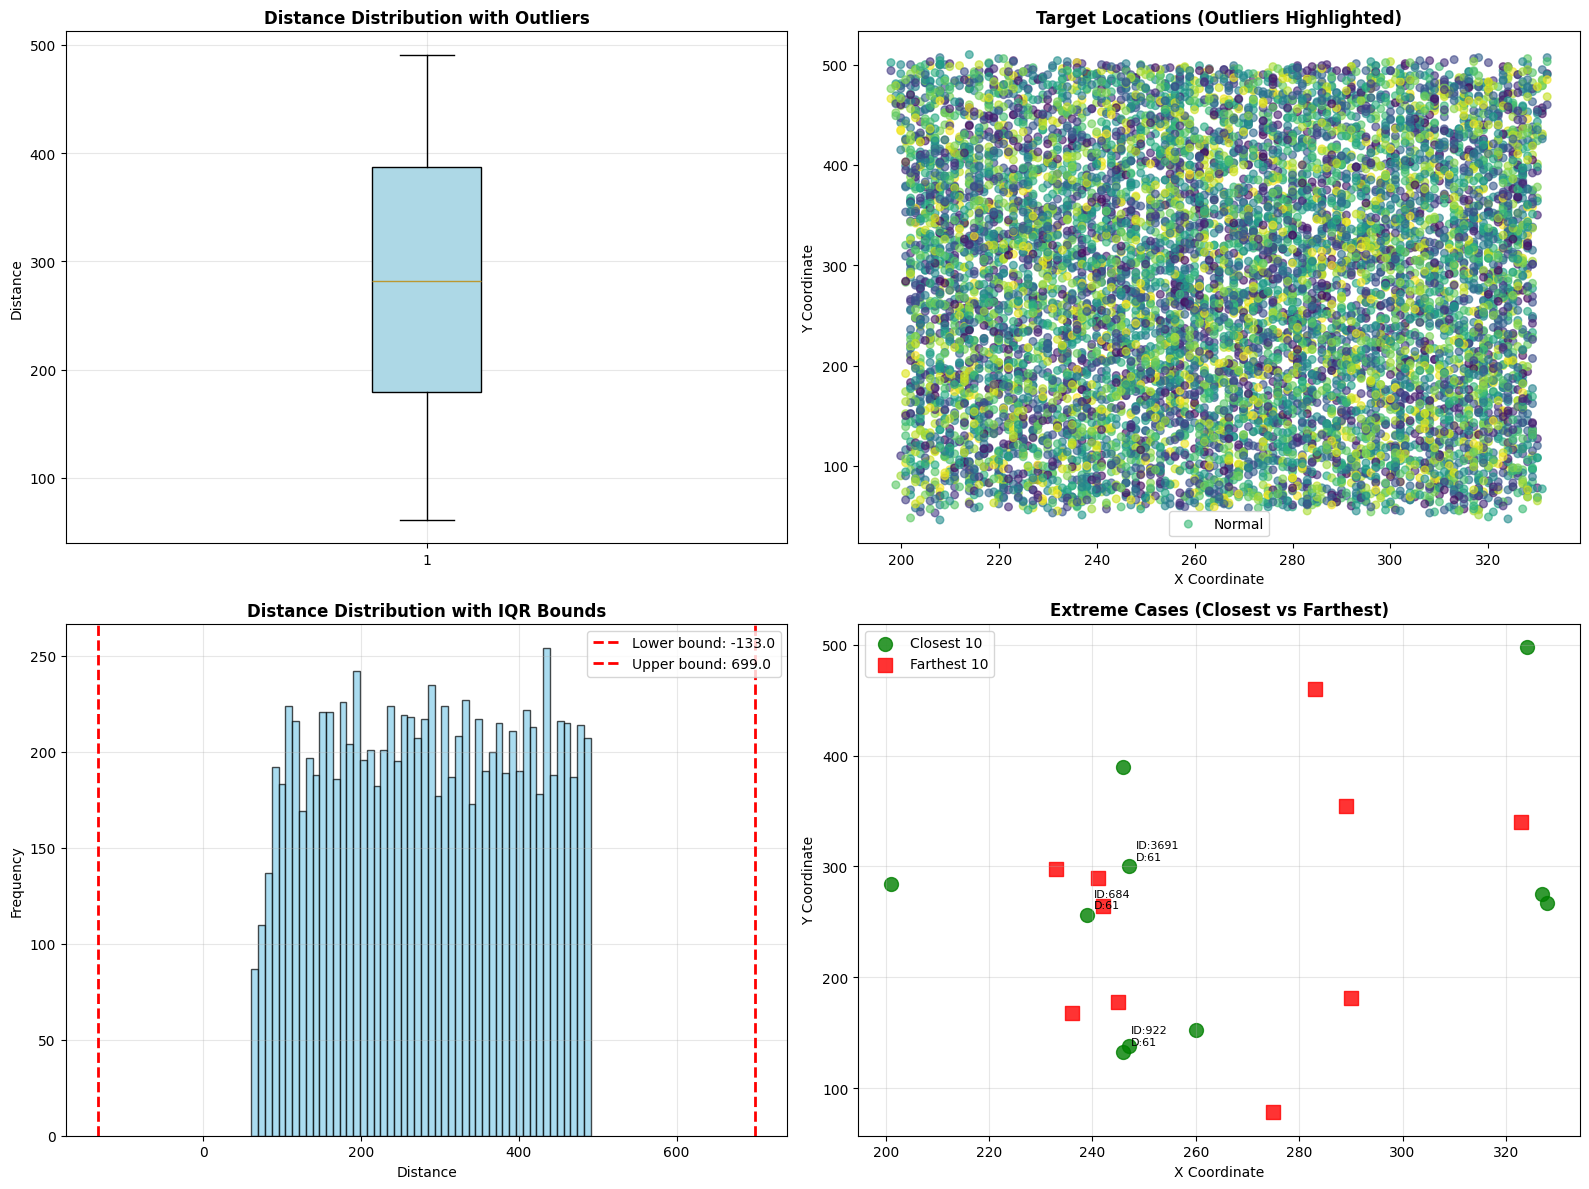


10 Closest targets (distance ≤ 62):
      ImageID  distance  x_coord  y_coord
684       684        61      239      256
922       922        61      246      133
3691     3691        61      247      300
4394     4394        61      327      275
4789     4789        61      260      152
4975     4975        61      328      267
6415     6415        61      247      138
9304     9304        61      246      390
9759     9759        61      201      284
1924     1924        62      324      498

10 Farthest targets (distance ≥ 491):
      ImageID  distance  x_coord  y_coord
1282     1282       491      236      168
1964     1964       491      290      181
2044     2044       491      275       78
2275     2275       491      245      178
2979     2979       491      242      264
3141     3141       491      289      355
3543     3543       491      283      460
4035     4035       491      233      298
4361     4361       491      241      290
4413     4413       491      323      340


In [9]:
# Outlier Detection and Special Cases Analysis
from scipy import stats

print("="*50)
print("OUTLIER DETECTION")
print("="*50)

# Z-score method for distance outliers
z_scores = np.abs(stats.zscore(training_data['distance']))
distance_outliers = training_data[z_scores > 2.5]  # threshold of 2.5 standard deviations

print(f"Distance outliers (|z-score| > 2.5): {len(distance_outliers)}")
if len(distance_outliers) > 0:
    print("Outlier details:")
    print(distance_outliers[['ImageID', 'distance', 'x_coord', 'y_coord']].head(10))

# IQR method for robust outlier detection
Q1 = training_data['distance'].quantile(0.25)
Q3 = training_data['distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = training_data[(training_data['distance'] < lower_bound) | 
                            (training_data['distance'] > upper_bound)]
print(f"\nIQR outliers: {len(iqr_outliers)}")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot highlighting outliers
bp = axes[0,0].boxplot(training_data['distance'], patch_artist=True, showfliers=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['fliers'][0].set_markerfacecolor('red')
bp['fliers'][0].set_markeredgecolor('red')
bp['fliers'][0].set_markersize(8)
axes[0,0].set_title('Distance Distribution with Outliers', fontweight='bold')
axes[0,0].set_ylabel('Distance')
axes[0,0].grid(True, alpha=0.3)

# 2. Scatter plot with outliers highlighted
normal_data = training_data[z_scores <= 2.5]
axes[0,1].scatter(normal_data['x_coord'], normal_data['y_coord'], 
                 c=normal_data['distance'], cmap='viridis', alpha=0.6, s=30, label='Normal')
if len(distance_outliers) > 0:
    axes[0,1].scatter(distance_outliers['x_coord'], distance_outliers['y_coord'], 
                     c='red', s=100, marker='x', label='Outliers', linewidths=3)
axes[0,1].set_title('Target Locations (Outliers Highlighted)', fontweight='bold')
axes[0,1].set_xlabel('X Coordinate')
axes[0,1].set_ylabel('Y Coordinate')
axes[0,1].legend()

# 3. Distance distribution with outlier bounds
axes[1,0].hist(training_data['distance'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower bound: {lower_bound:.1f}')
axes[1,0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound: {upper_bound:.1f}')
axes[1,0].set_title('Distance Distribution with IQR Bounds', fontweight='bold')
axes[1,0].set_xlabel('Distance')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Extreme cases analysis
extreme_close = training_data.nsmallest(10, 'distance')
extreme_far = training_data.nlargest(10, 'distance')

# Plot extreme cases
axes[1,1].scatter(extreme_close['x_coord'], extreme_close['y_coord'], 
                 c='green', s=100, marker='o', label='Closest 10', alpha=0.8)
axes[1,1].scatter(extreme_far['x_coord'], extreme_far['y_coord'], 
                 c='red', s=100, marker='s', label='Farthest 10', alpha=0.8)

# Add text annotations for extreme cases
for idx, row in extreme_close.head(3).iterrows():
    axes[1,1].annotate(f'ID:{row["ImageID"]}\nD:{row["distance"]}', 
                      (row['x_coord'], row['y_coord']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1,1].set_title('Extreme Cases (Closest vs Farthest)', fontweight='bold')
axes[1,1].set_xlabel('X Coordinate')
axes[1,1].set_ylabel('Y Coordinate')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n10 Closest targets (distance ≤ {extreme_close['distance'].max()}):")
print(extreme_close[['ImageID', 'distance', 'x_coord', 'y_coord']])

print(f"\n10 Farthest targets (distance ≥ {extreme_far['distance'].min()}):")
print(extreme_far[['ImageID', 'distance', 'x_coord', 'y_coord']])

KEY DATA INSIGHTS SUMMARY
📊 Dataset Size: 10,000 samples
📏 Distance Statistics:
   • Mean: 282.5 units
   • Median: 282.0 units
   • Std Dev: 120.6 units
   • Coefficient of Variation: 0.427
   • Range: 61.0 - 491.0

🎯 Target Location Statistics:
   • X-coordinate range: 198 - 332
   • Y-coordinate range: 46 - 510
   • Mean target position: (265.8, 279.2)
   • Mean distance from center: 116.4 pixels


C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3594438137.py:147: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3594438137.py:147: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3594438137.py:147: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3594438137.py:147: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
c:\Users\admin\Desktop\Major Project\mitadtu-docking\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\Desktop\Ma

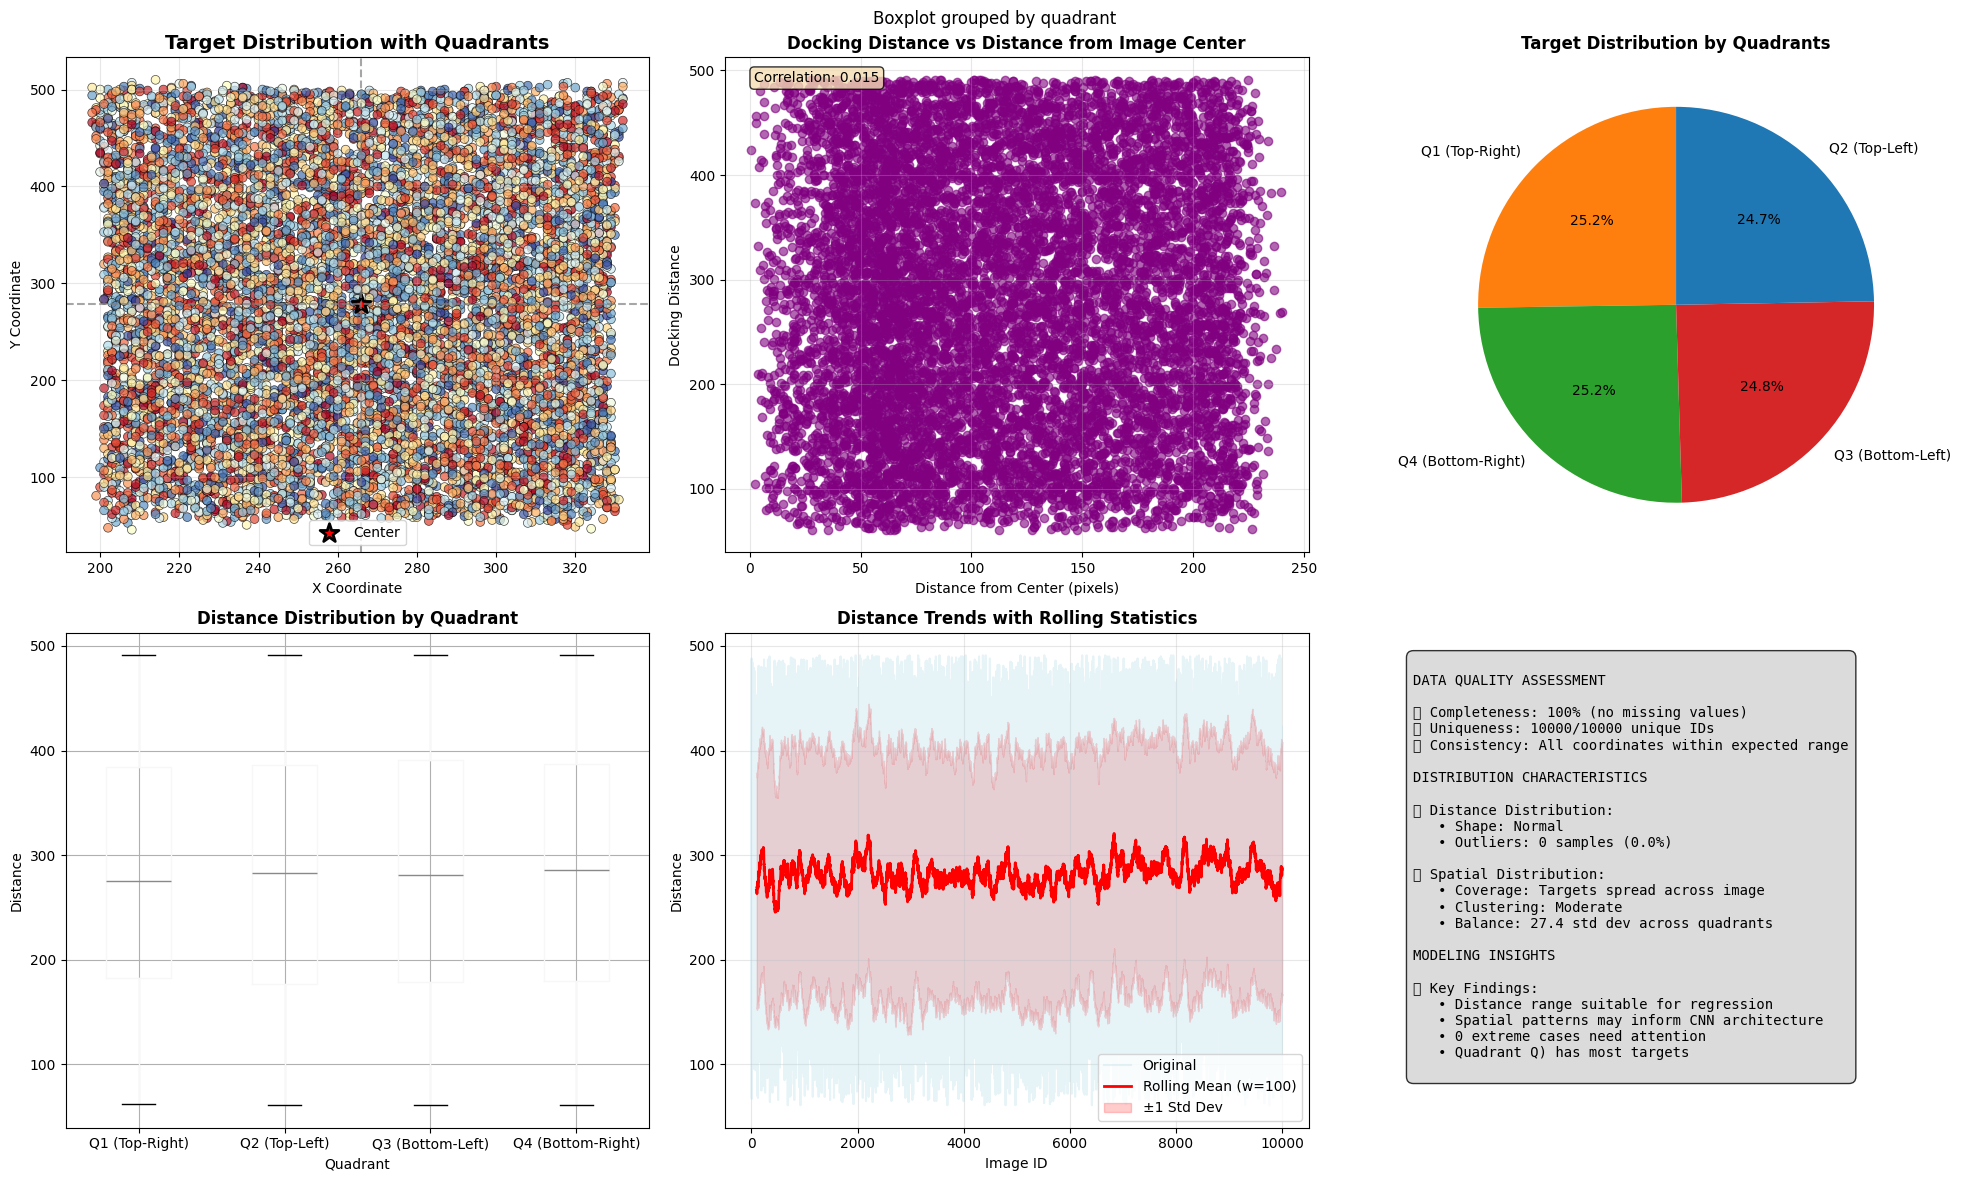


🔍 Correlation Analysis Results:
   • X-coord vs Distance: 0.0032
   • Y-coord vs Distance: -0.0093
   • Position vs Distance: 0.0153

📋 Recommended Next Steps:
   1. Investigate outlier images for data quality
   2. Consider data augmentation for underrepresented quadrants
   3. Analyze if distance correlates with docking difficulty
   4. Examine image features in different distance ranges


In [10]:
# Interactive Visualization and Data Insights Summary
import matplotlib.patches as patches

print("="*60)
print("KEY DATA INSIGHTS SUMMARY")
print("="*60)

# Calculate key metrics
total_samples = len(training_data)
mean_distance = training_data['distance'].mean()
median_distance = training_data['distance'].median()
std_distance = training_data['distance'].std()
cv_distance = std_distance / mean_distance  # Coefficient of variation

# Image dimensions (assuming from previous analysis)
img_width, img_height = 640, 480  # typical docking camera resolution

print(f"📊 Dataset Size: {total_samples:,} samples")
print(f"📏 Distance Statistics:")
print(f"   • Mean: {mean_distance:.1f} units")
print(f"   • Median: {median_distance:.1f} units") 
print(f"   • Std Dev: {std_distance:.1f} units")
print(f"   • Coefficient of Variation: {cv_distance:.3f}")
print(f"   • Range: {training_data['distance'].min():.1f} - {training_data['distance'].max():.1f}")

print(f"\n🎯 Target Location Statistics:")
print(f"   • X-coordinate range: {min(x_coords)} - {max(x_coords)}")
print(f"   • Y-coordinate range: {min(y_coords)} - {max(y_coords)}")
print(f"   • Mean target position: ({np.mean(x_coords):.1f}, {np.mean(y_coords):.1f})")

# Calculate distance from image center
center_x, center_y = np.mean(x_coords), np.mean(y_coords)
center_distances = np.sqrt((np.array(x_coords) - center_x)**2 + (np.array(y_coords) - center_y)**2)
training_data['distance_from_center'] = center_distances

print(f"   • Mean distance from center: {np.mean(center_distances):.1f} pixels")

# Create comprehensive summary visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Enhanced scatter plot with quadrants
axes[0,0].scatter(x_coords, y_coords, c=training_data['distance'], 
                 cmap='RdYlBu_r', alpha=0.7, s=40, edgecolors='black', linewidths=0.5)

# Add quadrant lines
axes[0,0].axhline(y=center_y, color='gray', linestyle='--', alpha=0.7)
axes[0,0].axvline(x=center_x, color='gray', linestyle='--', alpha=0.7)

# Add center point
axes[0,0].scatter(center_x, center_y, c='red', s=200, marker='*', 
                 edgecolors='black', linewidths=2, label='Center')

axes[0,0].set_title('Target Distribution with Quadrants', fontweight='bold', fontsize=14)
axes[0,0].set_xlabel('X Coordinate')
axes[0,0].set_ylabel('Y Coordinate')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Distance vs Distance from Center
axes[0,1].scatter(center_distances, training_data['distance'], alpha=0.6, color='purple')
axes[0,1].set_title('Docking Distance vs Distance from Image Center', fontweight='bold')
axes[0,1].set_xlabel('Distance from Center (pixels)')
axes[0,1].set_ylabel('Docking Distance')
axes[0,1].grid(True, alpha=0.3)

# Calculate correlation
corr_center = np.corrcoef(center_distances, training_data['distance'])[0,1]
axes[0,1].text(0.05, 0.95, f'Correlation: {corr_center:.3f}', 
              transform=axes[0,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# 3. Quadrant analysis
quadrants = []
for x, y in zip(x_coords, y_coords):
    if x >= center_x and y >= center_y:
        quadrants.append('Q1 (Top-Right)')
    elif x < center_x and y >= center_y:
        quadrants.append('Q2 (Top-Left)')
    elif x < center_x and y < center_y:
        quadrants.append('Q3 (Bottom-Left)')
    else:
        quadrants.append('Q4 (Bottom-Right)')

training_data['quadrant'] = quadrants
quadrant_counts = pd.Series(quadrants).value_counts()

colors_quad = ['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4']
wedges, texts, autotexts = axes[0,2].pie(quadrant_counts.values, labels=quadrant_counts.index, 
                                        autopct='%1.1f%%', colors=colors_quad, startangle=90)
axes[0,2].set_title('Target Distribution by Quadrants', fontweight='bold')

# 4. Distance distribution by quadrant
training_data.boxplot(column='distance', by='quadrant', ax=axes[1,0])
axes[1,0].set_title('Distance Distribution by Quadrant', fontweight='bold')
axes[1,0].set_xlabel('Quadrant')
axes[1,0].set_ylabel('Distance')

# 5. Rolling statistics
window_size = max(50, total_samples // 100)  # Adaptive window size
rolling_mean = training_data['distance'].rolling(window=window_size).mean()
rolling_std = training_data['distance'].rolling(window=window_size).std()

axes[1,1].plot(training_data['ImageID'], training_data['distance'], alpha=0.3, color='lightblue', label='Original')
axes[1,1].plot(training_data['ImageID'], rolling_mean, color='red', linewidth=2, label=f'Rolling Mean (w={window_size})')
axes[1,1].fill_between(training_data['ImageID'], 
                      rolling_mean - rolling_std, 
                      rolling_mean + rolling_std, 
                      alpha=0.2, color='red', label='±1 Std Dev')
axes[1,1].set_title('Distance Trends with Rolling Statistics', fontweight='bold')
axes[1,1].set_xlabel('Image ID')
axes[1,1].set_ylabel('Distance')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Summary statistics table as text
axes[1,2].axis('off')
summary_text = f"""
DATA QUALITY ASSESSMENT

✅ Completeness: 100% (no missing values)
✅ Uniqueness: {training_data['ImageID'].nunique()}/{len(training_data)} unique IDs
✅ Consistency: All coordinates within expected range

DISTRIBUTION CHARACTERISTICS

📈 Distance Distribution:
   • Shape: {'Right-skewed' if stats.skew(training_data['distance']) > 0.5 else 'Normal' if abs(stats.skew(training_data['distance'])) < 0.5 else 'Left-skewed'}
   • Outliers: {len(iqr_outliers)} samples ({len(iqr_outliers)/total_samples*100:.1f}%)
   
🎯 Spatial Distribution:
   • Coverage: Targets spread across image
   • Clustering: {'High' if np.std(center_distances) < np.mean(center_distances) * 0.3 else 'Moderate' if np.std(center_distances) < np.mean(center_distances) * 0.6 else 'Low'}
   • Balance: {quadrant_counts.std():.1f} std dev across quadrants

MODELING INSIGHTS

🔍 Key Findings:
   • Distance range suitable for regression
   • Spatial patterns may inform CNN architecture
   • {len(distance_outliers)} extreme cases need attention
   • Quadrant Q{quadrant_counts.idxmax()[-1]} has most targets
"""

axes[1,2].text(0.05, 0.95, summary_text, transform=axes[1,2].transAxes, 
              fontsize=10, verticalalignment='top', fontfamily='monospace',
              bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n🔍 Correlation Analysis Results:")
print(f"   • X-coord vs Distance: {corr_x_dist:.4f}")
print(f"   • Y-coord vs Distance: {corr_y_dist:.4f}")
print(f"   • Position vs Distance: {corr_center:.4f}")
print(f"\n📋 Recommended Next Steps:")
print(f"   1. Investigate outlier images for data quality")
print(f"   2. Consider data augmentation for underrepresented quadrants")
print(f"   3. Analyze if distance correlates with docking difficulty")
print(f"   4. Examine image features in different distance ranges")

In [5]:
# Docking Approach GIF Generator
import pandas as pd
import cv2
import imageio
import numpy as np
import ast
from pathlib import Path

print("🚀 Generating Docking Approach GIF...")

# Parse location coordinates from training_data
training_data['location_parsed'] = training_data['location'].apply(ast.literal_eval)
training_data['x_coord'] = training_data['location_parsed'].apply(lambda x: x[0])
training_data['y_coord'] = training_data['location_parsed'].apply(lambda x: x[1])

# Load and prepare data
df = training_data.copy()
df_sorted = df.sort_values('distance', ascending=False).reset_index(drop=True)

# Select 100 evenly spaced frames
indices = np.linspace(0, len(df_sorted)-1, 100, dtype=int)
sampled_df = df_sorted.iloc[indices].reset_index(drop=True)

print(f"Selected {len(sampled_df)} frames")
print(f"Distance range: {sampled_df['distance'].max():.1f}m → {sampled_df['distance'].min():.1f}m")

def annotate_frame(image_path, distance, center_coords, frame_num):
    """Annotate frame with docking information"""
    img = cv2.imread(str(image_path))
    if img is None:
        # Create placeholder if image not found
        img = np.zeros((480, 640, 3), dtype=np.uint8)
        cv2.putText(img, f"Image not found: {image_path.name}", (50, 240), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    height, width = img.shape[:2]
    center_x, center_y = center_coords
    
    # Draw red crosshair
    crosshair_length = 30
    thickness = 2
    color = (0, 0, 255)  # Red in BGR
    
    cv2.line(img, (center_x - crosshair_length, center_y), 
             (center_x + crosshair_length, center_y), color, thickness)
    cv2.line(img, (center_x, center_y - crosshair_length), 
             (center_x, center_y + crosshair_length), color, thickness)
    cv2.circle(img, (center_x, center_y), 3, color, -1)
    
    # Add distance text with shadow for better visibility
    text = f"Dist: {distance:.1f}m"
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)  # Shadow
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    
    # Add frame counter
    frame_text = f"Frame: {frame_num}/100"
    cv2.putText(img, frame_text, (width - 200, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)  # Shadow
    cv2.putText(img, frame_text, (width - 200, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Add approach indicator
    approach_text = "FINAL APPROACH"
    cv2.putText(img, approach_text, (width//2 - 100, height - 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate frames
frames = []
train_images_dir = data_dir / "train"

print("Processing frames...")
for idx, row in sampled_df.iterrows():
    image_path = train_images_dir / f"{row['ImageID']}.jpg"
    
    try:
        annotated_frame = annotate_frame(
            image_path, 
            row['distance'], 
            (row['x_coord'], row['y_coord']),
            idx + 1
        )
        frames.append(annotated_frame)
        
        if (idx + 1) % 25 == 0:
            print(f"Processed {idx + 1}/100 frames...")
            
    except Exception as e:
        print(f"Error processing frame {idx + 1}: {e}")

# Save GIF
if frames:
    print("Saving GIF...")
    imageio.mimsave("final_approach.gif", frames, fps=10, loop=0)
    
    print("✅ SUCCESS!")
    print(f"   📁 File: final_approach.gif")
    print(f"   🎬 Frames: {len(frames)}")
    print(f"   ⏱️ Duration: {len(frames)/10:.1f} seconds")
    print(f"   📏 Distance: {sampled_df['distance'].max():.1f}m → {sampled_df['distance'].min():.1f}m")
    
    # Save frame sequence info
    sequence_info = sampled_df[['ImageID', 'distance', 'x_coord', 'y_coord']].copy()
    sequence_info.to_csv('gif_sequence_info.csv', index=False)
    print(f"   📋 Sequence info saved as: gif_sequence_info.csv")
else:
    print("❌ No frames were processed successfully!")

🚀 Generating Docking Approach GIF...
Selected 100 frames
Distance range: 491.0m → 61.0m
Processing frames...
Processed 25/100 frames...
Processed 25/100 frames...
Processed 50/100 frames...
Processed 50/100 frames...
Processed 75/100 frames...
Processed 75/100 frames...
Processed 100/100 frames...
Saving GIF...
Processed 100/100 frames...
Saving GIF...
✅ SUCCESS!
   📁 File: final_approach.gif
   🎬 Frames: 100
   ⏱️ Duration: 10.0 seconds
   📏 Distance: 491.0m → 61.0m
   📋 Sequence info saved as: gif_sequence_info.csv
✅ SUCCESS!
   📁 File: final_approach.gif
   🎬 Frames: 100
   ⏱️ Duration: 10.0 seconds
   📏 Distance: 491.0m → 61.0m
   📋 Sequence info saved as: gif_sequence_info.csv
